In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas
import requests
import sys
os.environ['PYWTK_CACHE_DIR'] = os.path.join(os.environ['HOME'], "pywtk-data")
from pywtk.wtk_api import get_nc_data, site_from_cache, WIND_FCST_DIR, WIND_MET_NC_DIR


/Users/hsorense/anaconda2/envs/pywtk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Verify directories are set properly

In [2]:
print(WIND_FCST_DIR)
print(WIND_MET_NC_DIR)

/Users/hsorense/pywtk-data/fcst_data
/Users/hsorense/pywtk-data/met_data


### Load interesting sites

In [3]:
import csv
site_data = {}
with open('interesting_sites.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        site_data[row['site_id']] = row
all_site_ids = site_data.keys()

### Pull data for first 5 sites using site_from_cache

In [4]:
for site in all_site_ids[:5]:
    file_dir = site_from_cache(site, WIND_MET_NC_DIR)
    print("Downloaded to %s"%file_dir)

Downloaded to /Users/hsorense/pywtk-data/met_data/221/110556.nc
Downloaded to /Users/hsorense/pywtk-data/met_data/221/110557.nc
Downloaded to /Users/hsorense/pywtk-data/met_data/221/110554.nc
Downloaded to /Users/hsorense/pywtk-data/met_data/221/110555.nc
Downloaded to /Users/hsorense/pywtk-data/met_data/221/110552.nc


### Pull data for next 5 sites and create dictionary of dataframes

In [5]:

WTK_URL = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-31', tz='utc')
utc = True
leap_day = True
attributes = ["power", "wind_speed"]
wind_data = {}
for site in all_site_ids[:10]:
    wind_data[site] = get_nc_data(site, start, end, attributes=attributes, leap_day=leap_day, utc=utc, nc_dir=WIND_MET_NC_DIR)
    print("Have data for %s"%site)

Have data for 110556
Have data for 110557
Have data for 110554
Have data for 110555
Have data for 110552
Have data for 110553
Have data for 110550
Have data for 110551
Have data for 110558
Have data for 110559


In [6]:
wind_data.keys()

['110556',
 '110557',
 '110554',
 '110555',
 '110552',
 '110553',
 '110550',
 '110551',
 '110558',
 '110559']

### Concatenate all data into a single dataframe

In [7]:
for (site_id, site_df) in wind_data.iteritems():
    site_df['site_id'] = site_id
total_df = pandas.concat(wind_data.values())

In [8]:
total_df.head()

,power,wind_speed,site_id
datetime,,,
2013-01-01 00:00:00+00:00,12.0,15.595691,110556
2013-01-01 00:05:00+00:00,12.0,15.470577,110556
2013-01-01 00:10:00+00:00,12.0,15.372921,110556
2013-01-01 00:15:00+00:00,12.0,15.302741,110556
2013-01-01 00:20:00+00:00,12.0,15.232550,110556


### Create a wind speed and a power dataframe for export.

In [9]:
power_df=total_df.reset_index().pivot(columns='site_id', index='datetime', values='power')
wind_df=total_df.reset_index().pivot(columns='site_id', index='datetime', values='wind_speed')

### Plot power and wind speed for each site id

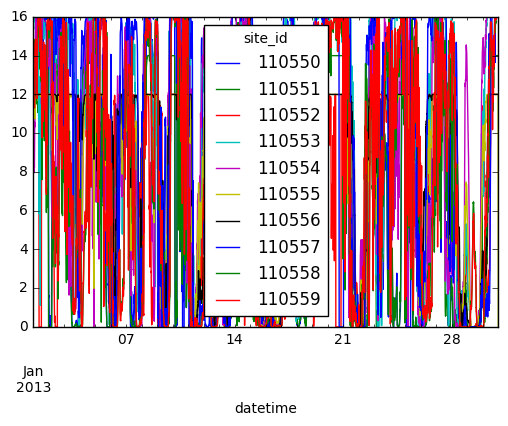

In [10]:
power_df.plot()

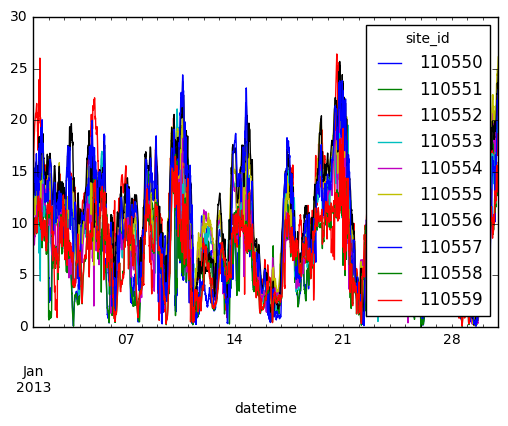

In [11]:
wind_df.plot()

In [12]:
wind_df.to_csv('wtk_wind.csv')
power_df.to_csv('wtk_power.csv')

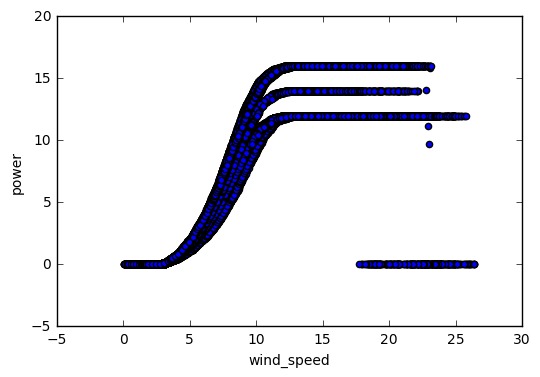

In [13]:
total_df.plot(kind='scatter', x='wind_speed', y='power')